#### 0. 학습 데이터 전처리

In [4]:
# 압축풀기
%cd drive/MyDrive/Colab\ Notebooks/22.04.11\ 머신러닝(교육실D)

/content/drive/MyDrive/Colab Notebooks/22.04.11 머신러닝(교육실D)


In [5]:
!ls

 data
'ex00_colab 사용하기.ipynb'
'ex01_비만도 데이터 학습하기.ipynb'
'ex02_주택가격 데이터 예측하기.ipynb'
'ex10_다중분류모델 만들기(3가지 동물 분류).ipynb'
'jupyter notebook'


In [ ]:
!unzip ./data/animal_data.zip -d ./data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os # 파이썬을 이용해 시스템 정보를 확인하고 제어하는 라이브러리

In [7]:
# 특정 폴더 밑에 사진이름이 규칙적이지 않을 경우에는 os모듈을 이용하자
img = cv2.imread('./data/dog/2.png')
img.shape

(224, 224, 3)

In [ ]:
# 폴더 밑에 있는 파일이나 디렉토리 이름을 얻어내는 함수
dog_file_names = os.listdir('./data/dog')
dog_file_names

In [9]:
cat_file_names = os.listdir('./data/cat')
fox_file_names = os.listdir('./data/desert_fox')

In [10]:
dog_images = []
for fname in dog_file_names:
    raw_img = cv2.imread('./data/dog/'+fname)
    raw_img_rgb = cv2.cvtColor(raw_img,cv2.COLOR_BGR2RGB) #BGR -> RGB
    # 이미지 크기 조절하기
    resize_img = cv2.resize(raw_img_rgb, dsize=(224,224), interpolation=cv2.INTER_AREA)
    # 이미지 정규화(-1 ~ 1)
    normalized_img = (np.array(resize_img,dtype=np.float32) / 127.0) - 1
    dog_images.append(np.array(normalized_img)) # numpy타입으로 변환
    
dog_images = np.array(dog_images)
dog_images.shape

(371, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


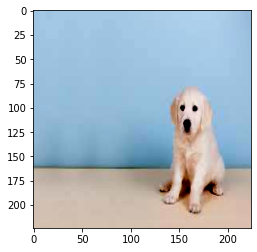

In [11]:
plt.imshow(dog_images[0])
plt.show()

In [13]:
cat_images = []
for fname in cat_file_names:
    raw_img = cv2.imread('./data/cat/'+fname)
    raw_img_rgb = cv2.cvtColor(raw_img,cv2.COLOR_BGR2RGB) #BGR -> RGB
    # 이미지 크기 조절하기
    resize_img = cv2.resize(raw_img_rgb, dsize=(224,224), interpolation=cv2.INTER_AREA)
    # 이미지 정규화(-1 ~ 1)
    normalized_img = (np.array(resize_img,dtype=np.float32) / 127.0) - 1
    cat_images.append(np.array(normalized_img)) # numpy타입으로 변환
    
cat_images = np.array(cat_images)
cat_images.shape

(402, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


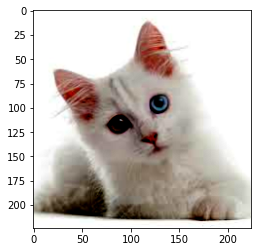

In [14]:
plt.imshow(cat_images[0])
plt.show()

In [15]:
fox_images = []
for fname in fox_file_names:
    raw_img = cv2.imread('./data/desert_fox/'+fname)
    raw_img_rgb = cv2.cvtColor(raw_img,cv2.COLOR_BGR2RGB) #BGR -> RGB
    # 이미지 크기 조절하기
    resize_img = cv2.resize(raw_img_rgb, dsize=(224,224), interpolation=cv2.INTER_AREA)
    # 이미지 정규화(-1 ~ 1)
    normalized_img = (np.array(resize_img,dtype=np.float32) / 127.0) - 1
    fox_images.append(np.array(normalized_img)) # numpy타입으로 변환
    
fox_images = np.array(fox_images)
fox_images.shape

(372, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


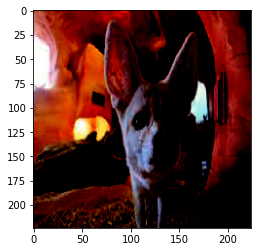

In [16]:
plt.imshow(fox_images[0])
plt.show()

In [17]:
X = np.concatenate([dog_images,cat_images,fox_images])
X.shape

(1145, 224, 224, 3)

In [18]:
# 개 0, 고양이 1, 사막여우 2
y = np.array([0] * 371 + [1] * 402 + [2] * 372)
y.shape

(1145,)

In [19]:
from tensorflow.keras.models import Sequential # 신경망을 붙이는 뼈대
from tensorflow.keras.layers import InputLayer, Dense # 입력층 / 중간및출력층

In [20]:
from tqdm import tqdm

#### 1. 모델 생성

In [ ]:
animal_model = Sequential() # 뼈대 생성
animal_model.add(InputLayer(input_shape=(224*224*3,))) #입력층
animal_model.add(Dense(units=128, activation='sigmoid')) #중간층
animal_model.add(Dense(units=128, activation='sigmoid')) #중간층
animal_model.add(Dense(units=64, activation='sigmoid')) #중간층
animal_model.add(Dense(units=32, activation='sigmoid')) #중간층
animal_model.add(Dense(units=3, activation='softmax')) #출력층

#### 2. 모델 학습

In [37]:
animal_model.compile(loss='sparse_categorical_crossentropy',
                    optimizer='Adam',
                    metrics=['accuracy'])

NameError: ignored

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=425)

In [40]:
X_train.shape

(916, 224, 224, 3)

In [41]:
animal_model.fit(X_train.reshape(916,224*224*3),
                y_train, epochs=100)

NameError: ignored

#### 3. 모델 예측

In [ ]:
X_test.shape

In [ ]:
pre = animal_model.predict(X_test.reshape(229,224*224*3))

In [ ]:
pre

#### 4. 모델 평가

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pre.argmax(1)))

## CNN 모델 만들기

In [21]:
from tensorflow.keras.layers import Conv2D,MaxPool2D, Flatten

#### 1. 모델생성

In [ ]:
cnn_model = Sequential() # 모델의 뼈대
# 특성 추출부
cnn_model.add(InputLayer(input_shape=(224,224,3)))
cnn_model.add(Conv2D(filters=128,
                    kernel_size=(3,3),
                    activation="relu"))
cnn_model.add(MaxPool2D()) # 불필요한 정보를 삭제
cnn_model.add(Conv2D(filters=256,
                    kernel_size=(3,3),
                    activation="relu"))
cnn_model.add(MaxPool2D())
cnn_model.add(Conv2D(filters=128,
                    kernel_size=(3,3),
                    activation="relu"))
cnn_model.add(MaxPool2D())
cnn_model.add(Conv2D(filters=64,
                    kernel_size=(3,3),
                    activation="relu"))
cnn_model.add(MaxPool2D())
# 분류기(MLP)
cnn_model.add(Flatten())
cnn_model.add(Dense(units=64,activation='sigmoid'))
cnn_model.add(Dense(units=32,activation='sigmoid'))
cnn_model.add(Dense(units=3,activation='softmax'))

In [ ]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 111, 111, 128)    0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 256)     295168    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 54, 54, 256)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 128)       295040    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 26, 26, 128)     

#### 2. 모델 학습

In [ ]:
cnn_model.compile(loss="sparse_categorical_crossentropy",
                 optimizer="Adam",
                 metrics=['accuracy'])

In [22]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=425)

In [ ]:
cnn_model.fit(X_train,y_train,epochs=50)

Epoch 1/50
29/29 [==============================] - 17s 455ms/step - loss: 1.1117 - accuracy: 0.3417
Epoch 2/50
29/29 [==============================] - 11s 388ms/step - loss: 1.0915 - accuracy: 0.3701
Epoch 3/50
29/29 [==============================] - 11s 386ms/step - loss: 1.0664 - accuracy: 0.4541
Epoch 4/50
29/29 [==============================] - 11s 387ms/step - loss: 1.0677 - accuracy: 0.4301
Epoch 5/50
29/29 [==============================] - 11s 385ms/step - loss: 1.0267 - accuracy: 0.4924
Epoch 6/50
29/29 [==============================] - 11s 387ms/step - loss: 0.9979 - accuracy: 0.5066
Epoch 7/50
29/29 [==============================] - 11s 386ms/step - loss: 0.9412 - accuracy: 0.5535
Epoch 8/50
29/29 [==============================] - 11s 387ms/step - loss: 0.8441 - accuracy: 0.6266
Epoch 9/50
29/29 [==============================] - 11s 387ms/step - loss: 0.7218 - accuracy: 0.7194
Epoch 10/50
29/29 [==============================] - 11s 387ms/step - loss: 0.5855 - accura

#### 3. 모델 예측

In [ ]:
pre = cnn_model.predict(X_test)

#### 4. 모델 평가

In [23]:
from sklearn.metrics import classification_report

In [ ]:
pre[:5]

array([[8.3474256e-04, 9.9750948e-01, 1.6556962e-03],
       [9.9039513e-01, 1.9319650e-03, 7.6728710e-03],
       [3.8866031e-01, 2.4336243e-01, 3.6797729e-01],
       [4.7980887e-03, 9.9401134e-01, 1.1905787e-03],
       [2.1821461e-03, 1.3646644e-01, 8.6135149e-01]], dtype=float32)

In [ ]:
print(classification_report(y_test,np.argmax(pre,axis=1)))

In [ ]:
print(classification_report(y_test,np.argmax(pre,axis=1)))

In [ ]:
print(classification_report(y_test,np.argmax(pre,axis=1)))

# VGG16 전이학습

In [24]:
from tensorflow.keras.applications import VGG16

In [26]:
pre_trained_model = VGG16(include_top=False,
                          weights="imagenet",
                          input_shape=(224,224,3))

58900480/58889256 [==============================] - 0s 0us/step


In [27]:
pre_trained_model.summary() # 모델층의 요약정보

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [32]:
cnn_model2 = Sequential()
cnn_model2.add(pre_trained_model)
cnn_model2.add(Flatten())
cnn_model2.add(Dense(units=128,activation='relu'))
cnn_model2.add(Dense(units=64,activation='relu'))
cnn_model2.add(Dense(units=3,activation='softmax'))

In [33]:
# 특성추출방식
pre_trained_model.trainable = False

In [ ]:
cnn_model2.summary()

In [36]:
cnn_model2.compile(loss='sparse_categorical_crossentropy',
                   optimizer='Adam',
                   metrics = ['accuracy'])

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=425)

In [43]:
cnn_model2.fit(X_train,y_train,epochs=20)

Epoch 1/20
29/29 [==============================] - 19s 208ms/step - loss: 1.1201 - accuracy: 0.5600
Epoch 2/20
29/29 [==============================] - 4s 144ms/step - loss: 0.3220 - accuracy: 0.9028
Epoch 3/20
29/29 [==============================] - 4s 144ms/step - loss: 0.1279 - accuracy: 0.9803
Epoch 4/20
29/29 [==============================] - 4s 145ms/step - loss: 0.0548 - accuracy: 0.9967
Epoch 5/20
29/29 [==============================] - 4s 145ms/step - loss: 0.0206 - accuracy: 1.0000
Epoch 6/20
29/29 [==============================] - 4s 146ms/step - loss: 0.0095 - accuracy: 1.0000
Epoch 7/20
29/29 [==============================] - 4s 146ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 8/20
29/29 [==============================] - 4s 146ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 9/20
29/29 [==============================] - 4s 147ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 10/20
29/29 [==============================] - 4s 146ms/step - loss: 0.0025 - accuracy: 1.000

In [44]:
pre = cnn_model2.predict(X_test)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test,np.argmax(pre,axis=1)))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        70
           1       0.83      0.76      0.79        82
           2       0.79      0.79      0.79        77

    accuracy                           0.80       229
   macro avg       0.80      0.80      0.80       229
weighted avg       0.80      0.80      0.80       229



In [49]:
# 미세조정방식
pre_trained_model = VGG16(include_top=False,
                          weights="imagenet",
                          input_shape=(224,224,3))

for layer in pre_trained_model.layers:
  #print(layer.name)
  if layer.name == "block5_conv3":
    layer.trainable = True
  else:
    layer.trainable = False

In [50]:
cnn_model3 = Sequential()
cnn_model3.add(pre_trained_model)
cnn_model3.add(Flatten())
cnn_model3.add(Dense(units=128,activation='relu'))
cnn_model3.add(Dense(units=64,activation='relu'))
cnn_model3.add(Dense(units=3,activation='softmax'))

In [51]:
cnn_model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               3211392   
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 3)                 195       
                                                                 
Total params: 17,934,531
Trainable params: 5,579,651
Non-trainable params: 12,354,880
_________________________________________________________________


In [52]:
cnn_model3.compile(loss='sparse_categorical_crossentropy',
                   optimizer='Adam',
                   metrics = ['accuracy'])

In [53]:
cnn_model3.fit(X_train,y_train,epochs=20)

Epoch 1/20
29/29 [==============================] - 6s 150ms/step - loss: 1.0001 - accuracy: 0.5535
Epoch 2/20
29/29 [==============================] - 4s 148ms/step - loss: 0.3328 - accuracy: 0.8886
Epoch 3/20
29/29 [==============================] - 4s 149ms/step - loss: 0.1146 - accuracy: 0.9629
Epoch 4/20
29/29 [==============================] - 4s 149ms/step - loss: 0.0996 - accuracy: 0.9672
Epoch 5/20
29/29 [==============================] - 4s 149ms/step - loss: 0.0727 - accuracy: 0.9782
Epoch 6/20
29/29 [==============================] - 4s 150ms/step - loss: 0.0102 - accuracy: 1.0000
Epoch 7/20
29/29 [==============================] - 4s 154ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 8/20
29/29 [==============================] - 4s 151ms/step - loss: 2.7937e-04 - accuracy: 1.0000
Epoch 9/20
29/29 [==============================] - 4s 152ms/step - loss: 1.3613e-04 - accuracy: 1.0000
Epoch 10/20
29/29 [==============================] - 5s 158ms/step - loss: 9.2733e-05 - accu

In [54]:
pre = cnn_model3.predict(X_test)

In [55]:
print(classification_report(y_test,np.argmax(pre,axis=1)))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        70
           1       0.81      0.79      0.80        82
           2       0.84      0.84      0.84        77

    accuracy                           0.83       229
   macro avg       0.83      0.84      0.84       229
weighted avg       0.83      0.83      0.83       229



## 데이터 증강
- 모델의 과대적합을 방지하기 위한 기법

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [57]:
aug = ImageDataGenerator(rotation_range=90,
                         zoom_range=0.2,
                         horizontal_flip=True,
                         height_shift_range=0.2)

In [58]:
from tensorflow.keras.applications import MobileNetV2

In [59]:
pre_trained_model = MobileNetV2(include_top=False,
                          weights="imagenet",
                          input_shape=(224,224,3))
pre_trained_model.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
pre_trained_model.summary()

In [62]:
from tensorflow.keras.layers import AveragePooling2D

In [63]:
cnn_model4 = Sequential()
cnn_model4.add(pre_trained_model)
cnn_model4.add(AveragePooling2D())
cnn_model4.add(Flatten())
cnn_model4.add(Dense(units=128,activation='relu'))
cnn_model4.add(Dense(units=64,activation='relu'))
cnn_model4.add(Dense(units=3,activation='softmax'))

In [64]:
cnn_model4.compile(loss="sparse_categorical_crossentropy",
                   optimizer='Adam',
                   metrics=['accuracy'])

In [65]:
cnn_model4.fit(aug.flow(X_train,y_train),
               epochs=50)

Epoch 1/50
29/29 [==============================] - 12s 319ms/step - loss: 1.6107 - accuracy: 0.6146
Epoch 2/50
29/29 [==============================] - 9s 324ms/step - loss: 0.5094 - accuracy: 0.8024
Epoch 3/50
29/29 [==============================] - 10s 327ms/step - loss: 0.4072 - accuracy: 0.8384
Epoch 4/50
29/29 [==============================] - 9s 324ms/step - loss: 0.3843 - accuracy: 0.8537
Epoch 5/50
29/29 [==============================] - 9s 321ms/step - loss: 0.2919 - accuracy: 0.8974
Epoch 6/50
29/29 [==============================] - 9s 323ms/step - loss: 0.2861 - accuracy: 0.8963
Epoch 7/50
29/29 [==============================] - 10s 336ms/step - loss: 0.2822 - accuracy: 0.8821
Epoch 8/50
29/29 [==============================] - 9s 320ms/step - loss: 0.2366 - accuracy: 0.9083
Epoch 9/50
29/29 [==============================] - 9s 322ms/step - loss: 0.2578 - accuracy: 0.9072
Epoch 10/50
29/29 [==============================] - 10s 327ms/step - loss: 0.2704 - accuracy: 0.

In [66]:
pre = cnn_model4.predict(X_test)

In [67]:
print(classification_report(y_test,np.argmax(pre,axis=1)))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87        70
           1       0.86      0.84      0.85        82
           2       0.81      0.82      0.81        77

    accuracy                           0.84       229
   macro avg       0.84      0.84      0.84       229
weighted avg       0.84      0.84      0.84       229

